# EXPLORATORY DATA ANALYSIS ON OLYMPICS DATASET

OLYMPIC GAMES ANALYSIS – EXPLORING TRENDS, MEDALS, ATHLETES, AND MORE.

Introduction

In this Exploratory Data Analysis (EDA), we dive deep into the Olympics dataset to uncover patterns, trends, and insights related to athletes' demographics, medal distributions, country-wise performance, participation growth, and much more. From identifying top-performing nations to analyzing how host countries fare, this analysis provides a comprehensive view of the Olympic legacy through the lens of data.



# Olympic Games Dataset - Overview
This dataset contains historical data on athletes who participated in the Olympic Games from 1896 to 2016. It includes information such as:
- Athlete demographics (Name, Sex, Age, Height, Weight)
- Olympic participation details (Team, NOC, Year, City, Event)
- Medals won (Gold, Silver, Bronze)
 The goal of this Exploratory Data Analysis (EDA) is to uncover insights from the Olympics dataset.
 We aim to understand athlete demographics, country performances, sport-specific patterns, and Olympic trends.
 This analysis can guide decision-making for sports organizations and analytics professionals.

**Imported Required Libraries**


In [ ]:
import pandas as pd
import numpy as np  # For numerical operation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations

📅 Daily Log and Progress Tracker
✅ Day 1 - 2025-03-31
Imported dataset athlete_events.csv
Displayed basic info using df.info(), df.describe()
Checked for missing values using df.isnull().sum()

**Loading the Dataset**


In [ ]:
#Loading the Dataset
df=pd.read_csv(r'C:\Users\asus\Downloads\dataset_olympic.csv')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


**Summary statistics for numerical columns**


In [ ]:
#Summary statistics for numerical columns
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [ ]:
# Count missing values in each column
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

**Data Cleaning**


In [ ]:
df['Medal'] = df['Medal'].fillna('No Medal')


In [ ]:
df['Height'] = df.groupby(['Sport', 'Sex'])['Height'].transform(lambda x: x.fillna(x.median()))
df['Weight'] = df.groupby(['Sport', 'Sex'])['Weight'].transform(lambda x: x.fillna(x.median()))


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: M

In [ ]:
df.duplicated().sum()

np.int64(383)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


✅ Day 2 - 2025-04-1
Performed general analysis:
Counted unique athletes, sports, and events
Found most common sports and events using value_counts()

**General Analysis of Athletes and Events**

**1. Determine the total number of unique athletes, sports, and events**

In [ ]:
print("\nGeneral Statistics")
print(f"Total Unique Athletes: {df['Name'].nunique()}")
print(f"Total Unique Sports: {df['Sport'].nunique()}")
print(f"Total Unique Events: {df['Event'].nunique()}")


--- General Statistics ---
Total Unique Athletes: 35556
Total Unique Sports: 65
Total Unique Events: 744


**2. Identify the most common sports and events in the Olympics.**

In [ ]:
print("Most common sports:\n",df['Sport'].value_counts().head(10)) 

Most common sports:
 Sport
Athletics               10629
Gymnastics               6248
Swimming                 5964
Fencing                  3096
Shooting                 3040
Cycling                  2788
Rowing                   2690
Alpine Skiing            2326
Cross Country Skiing     2153
Football                 1959
Name: count, dtype: int64


In [ ]:
print("Most common events:\n",df['Event'].value_counts().head(10)) 

Most common events:
 Event
Football Men's Football                   1738
Hockey Men's Hockey                       1133
Ice Hockey Men's Ice Hockey               1009
Basketball Men's Basketball                921
Water Polo Men's Water Polo                911
Cycling Men's Road Race, Individual        737
Rowing Men's Coxed Eights                  648
Athletics Men's 4 x 100 metres Relay       591
Athletics Men's 100 metres                 585
Gymnastics Men's Individual All-Around     583
Name: count, dtype: int64


**3. Count of medals won by each country (NOC)**


In [ ]:
medal_counts = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
print(medal_counts)


NOC
USA    1561
FRA     660
ITA     604
GBR     604
URS     515
       ... 
WIF       0
YEM       0
YAR       0
YMD       0
ZAM       0
Name: Medal, Length: 226, dtype: int64


**4. Analyze the top-performing countries based on the total medal count.**

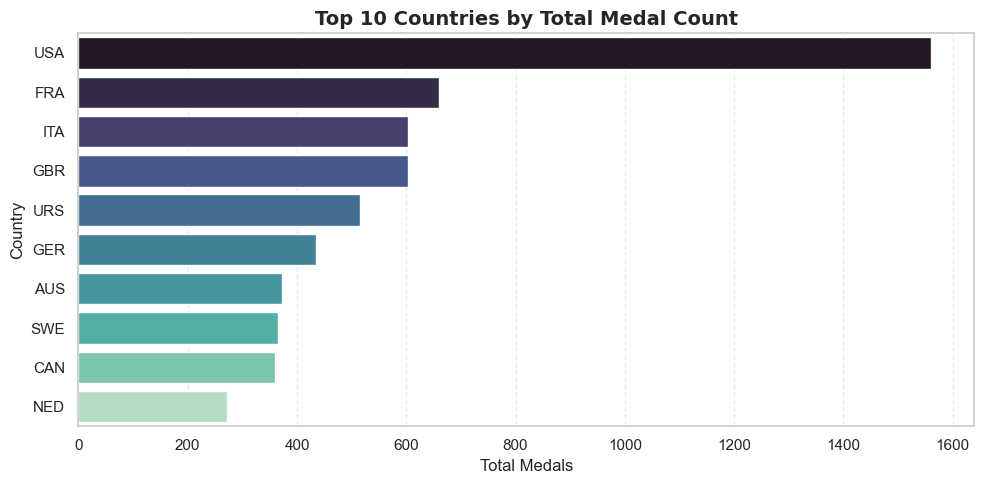

In [ ]:



medals_df = df[df['Medal'] != 'No Medal']
country_medals = medals_df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=country_medals.values,
    y=country_medals.index,
    hue=country_medals.index,
    dodge=False,
    legend=False,
    palette="mako"
)
plt.title('Top 10 Countries by Total Medal Count', fontsize=14, weight='bold', fontname='DejaVu Sans')
plt.xlabel('Total Medals', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**5. Compare the performance of countries across different Olympic years.**

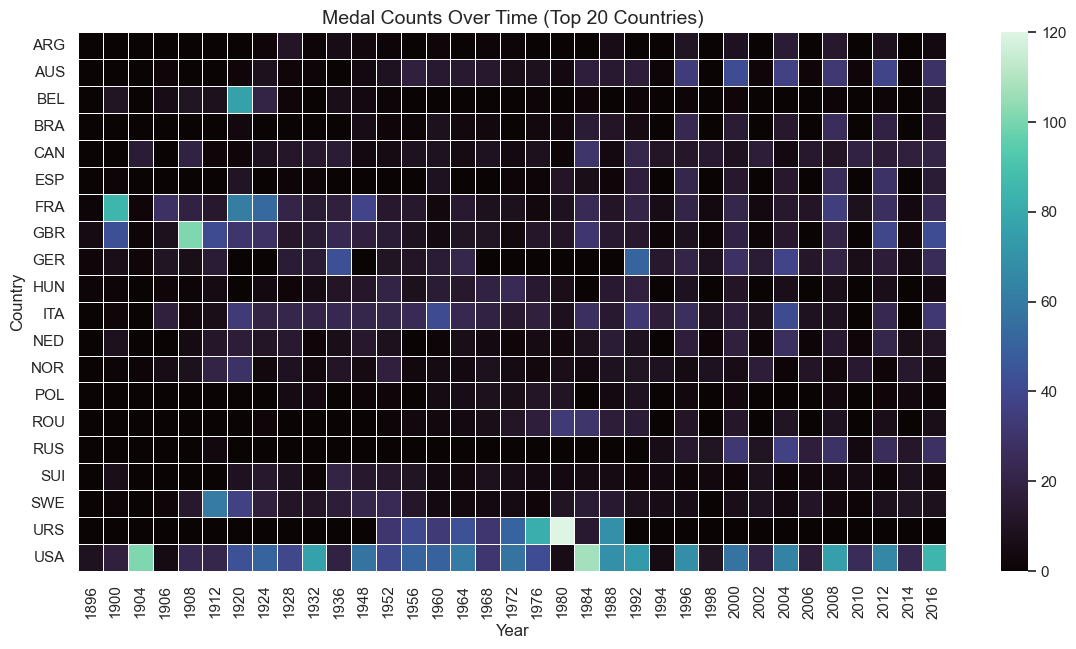

In [ ]:
top_countries = medals_df['NOC'].value_counts().head(20).index
filtered_df = medals_df[medals_df['NOC'].isin(top_countries)]

country_year = filtered_df.groupby(['Year', 'NOC'])['Medal'].count().unstack().fillna(0)

plt.figure(figsize=(14, 7))
sns.heatmap(country_year.T, cmap='mako', linewidths=0.5, linecolor='white')
plt.title('Medal Counts Over Time (Top 20 Countries)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


In [ ]:
host_mapping = {
    'London': 'Great Britain',
    'Beijing': 'China',
    'Athens': 'Greece',
    'Rio de Janeiro': 'Brazil',
    'Tokyo': 'Japan',
    'Sydney': 'Australia',
    'Atlanta': 'United States',
    'Los Angeles': 'United States',
    'Barcelona': 'Spain',
    'Seoul': 'South Korea',
    'Munich': 'Germany',
    'Moscow': 'Russia',
    'Mexico City': 'Mexico'
}

# Extract only rows with medals
medal_df = df[df['Medal'].notna()]

# Check host countries' medal count in their host year
host_results = []

for city, country in host_mapping.items():
    years_hosted = df[df['City'] == city]['Year'].unique()
    for year in years_hosted:
        medals_won = medal_df[(medal_df['Team'] == country) & (medal_df['Year'] == year)].shape[0]
        host_results.append({
            'Country': country,
            'City': city,
            'Year': year,
            'Medals_in_Host_Year': medals_won
        })

host_df = pd.DataFrame(host_results)
host_df.sort_values(by='Medals_in_Host_Year', ascending=False, inplace=True)
print(host_df)


          Country            City  Year  Medals_in_Host_Year
9   United States     Los Angeles  1984                  105
7   United States         Atlanta  1996                   67
8   United States     Los Angeles  1932                   61
2   Great Britain          London  1908                   45
6       Australia          Sydney  2000                   41
0   Great Britain          London  2012                   38
3           China         Beijing  2008                   24
10          Spain       Barcelona  1992                   17
1   Great Britain          London  1948                   17
4          Brazil  Rio de Janeiro  2016                   11
5           Japan           Tokyo  1964                    6
11    South Korea           Seoul  1988                    5
13         Mexico     Mexico City  1968                    1
12        Germany          Munich  1972                    0


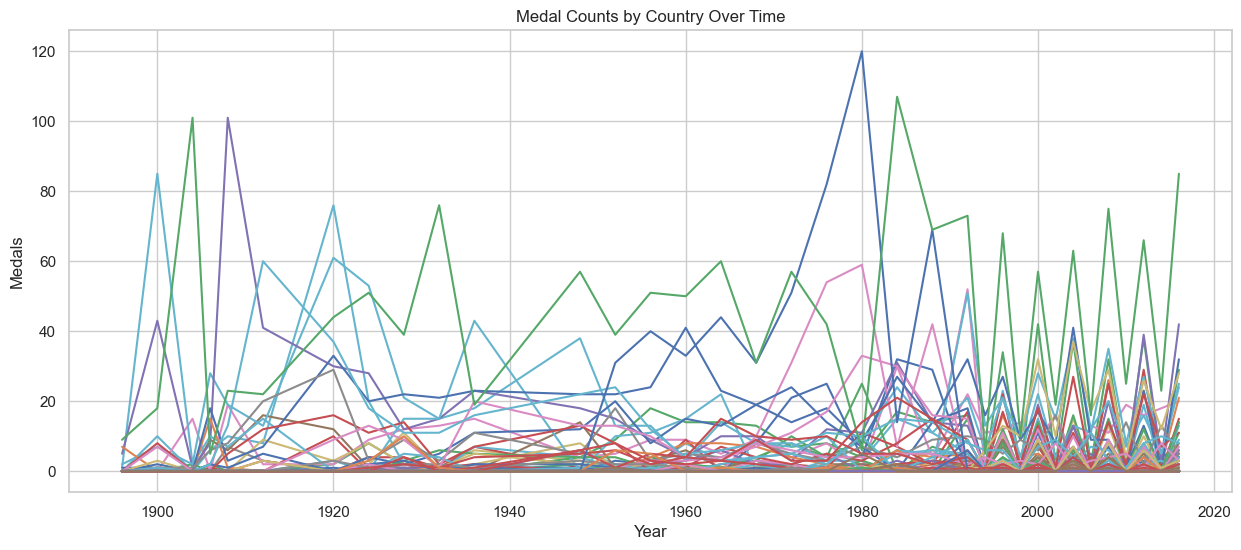

In [ ]:
country_year = medals_df.groupby(['Year', 'NOC'])['Medal'].count().unstack().fillna(0)
country_year.plot(figsize=(15,6), legend=False)
plt.title('Medal Counts by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Medals')
plt.show() 

**6. Number of athletes in Summer vs. Winter Olympics**


In [ ]:
season_comparison = df.groupby("Season")["ID"].nunique()
print(season_comparison)


Season
Summer    31209
Winter     4486
Name: ID, dtype: int64


**7. Find the average age, height, and weight of athletes across different sports.**

In [ ]:
age_analysis = df.groupby("Sport")["Age"].mean().sort_values()
print(age_analysis.head(10))


Sport
Rhythmic Gymnastics          18.557692
Swimming                     20.525409
Synchronized Swimming        22.121569
Racquets                     22.333333
Diving                       22.377778
Figure Skating               22.402397
Gymnastics                   22.574747
Boxing                       22.908216
Short Track Speed Skating    22.910112
Alpine Skiing                23.099740
Name: Age, dtype: float64


In [ ]:
df.groupby('Sport')[['Age', 'Height', 'Weight']].mean().sort_values(by='Age', ascending=False)


,Age,Height,Weight
Sport,,,
Art Competitions,45.662162,180.733333,86.000000
Alpinism,40.666667,NaN,NaN
Roque,37.000000,NaN,NaN
Jeu De Paume,36.000000,NaN,NaN
Polo,35.388889,NaN,NaN
...,...,...,...
Diving,22.377778,166.197441,60.486590
Racquets,22.333333,NaN,NaN
Synchronized Swimming,22.121569,167.721311,55.799163


**8.find sports with youngest and oldest participants**

In [ ]:
 #Find sports with youngest and oldest participants
youngest = df.groupby('Sport')['Age'].min().sort_values().head()
oldest = df.groupby('Sport')['Age'].max().sort_values(ascending=False).head()
print("\n--- Youngest Sports ---")
print(youngest)
print("\n--- Oldest Sports ---")
print(oldest)



--- Youngest Sports ---
Sport
Figure Skating    11.0
Rowing            12.0
Swimming          12.0
Diving            13.0
Gymnastics        13.0
Name: Age, dtype: float64

--- Oldest Sports ---
Sport
Art Competitions    88.0
Equestrianism       69.0
Archery             68.0
Shooting            65.0
Sailing             61.0
Name: Age, dtype: float64


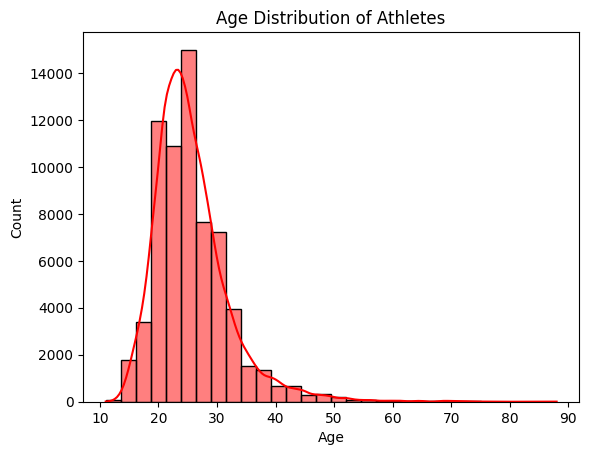

In [ ]:
# Univariate Analysis (Individual Feature Analysis)
#Distribution of Numerical Features (Age, Height, Weight)
sns.histplot(df['Age'], bins=30, kde=True,color="red")
plt.title("Age Distribution of Athletes")
plt.show()

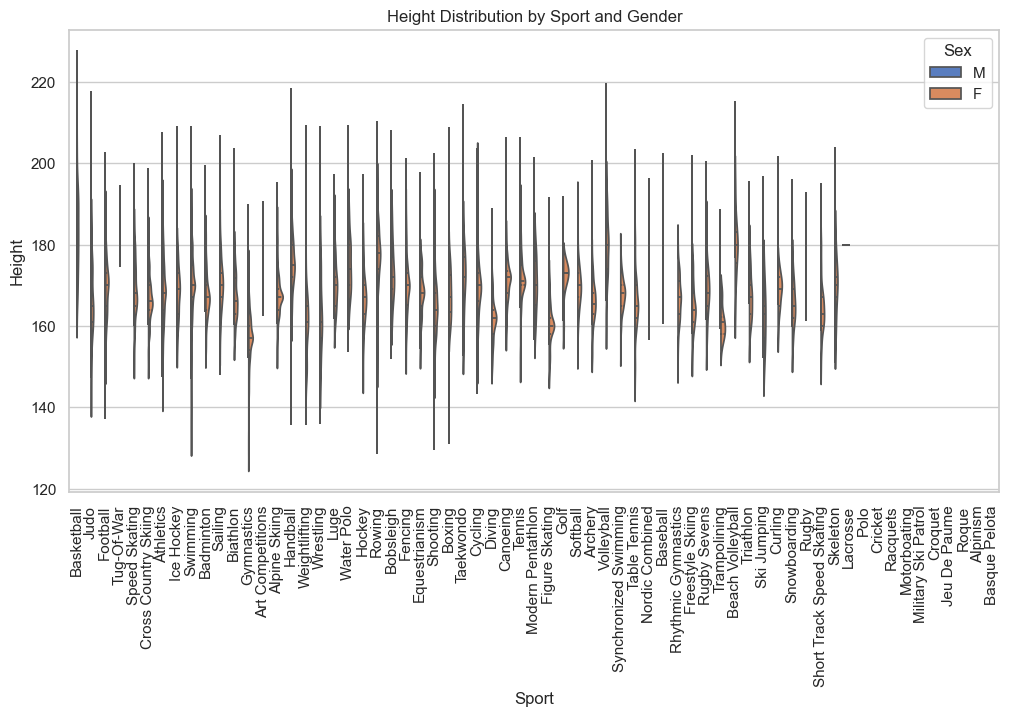

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Sport', y='Height', hue='Sex', data=df, split=True, inner='quart', palette='muted')
plt.xticks(rotation=90)
plt.title('Height Distribution by Sport and Gender')
plt.show()


**10. Analyze the gender ratio of athletes in the Olympics over the years.**

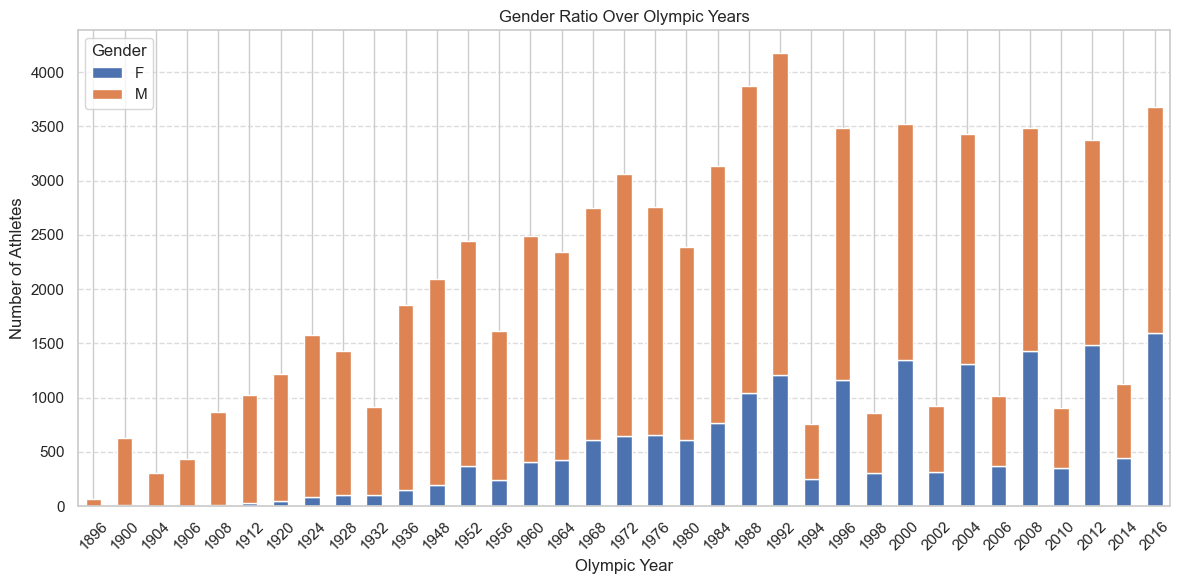

In [ ]:
gender_count = df.groupby(['Year', 'Sex']).size().unstack()
gender_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Gender Ratio Over Olympic Years")
plt.xlabel("Olympic Year")
plt.ylabel("Number of Athletes")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**11. Count number of Male and Female athletes per sport**

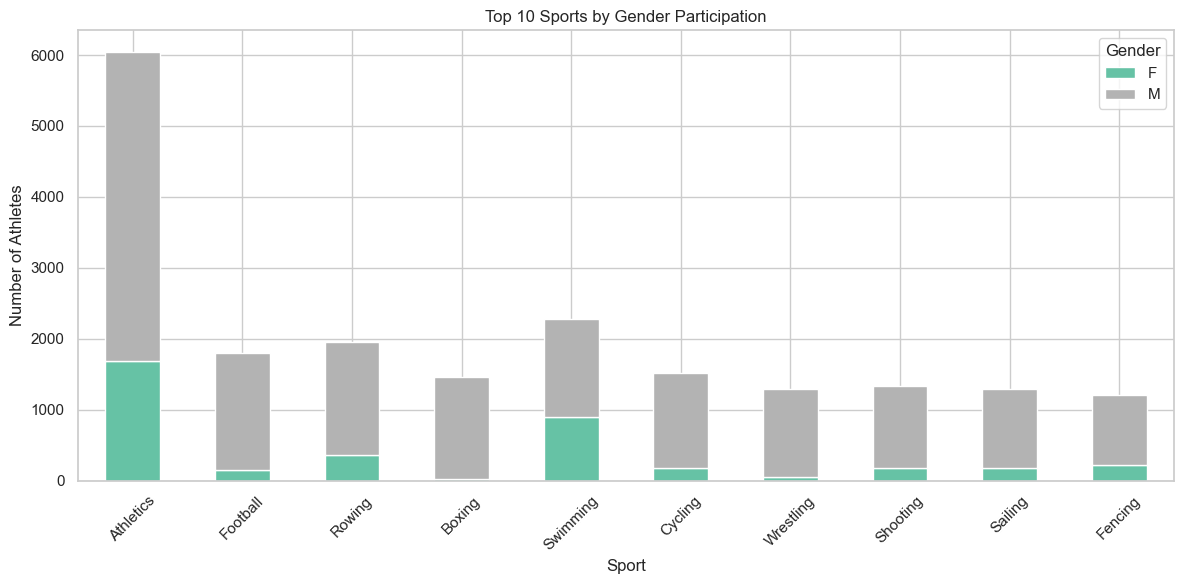

In [ ]:
# Count number of Male and Female athletes per sport
gender_sport = df.groupby(['Sport', 'Sex'])['ID'].nunique().unstack().fillna(0)

# Plot
gender_sport.sort_values(by=['M', 'F'], ascending=False).head(10).plot(
    kind='bar', figsize=(12,6), stacked=True, colormap='Set2'
)
plt.title('Top 10 Sports by Gender Participation')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


**12. Find the athletes who have won the most medals.**

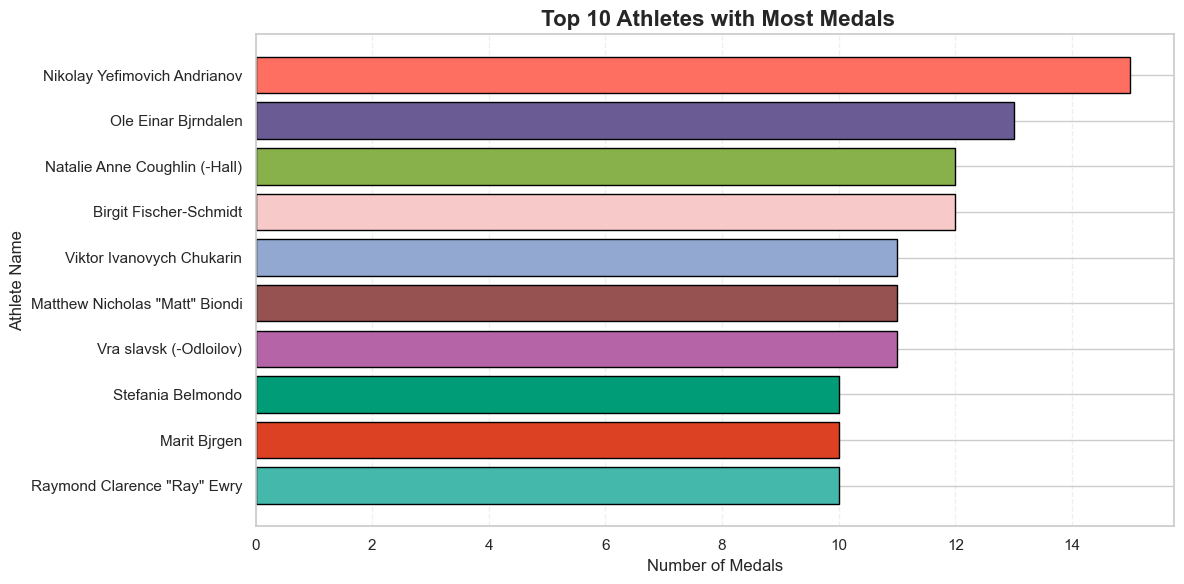

In [ ]:
medal_winners = df[df['Medal'].notna()]

# Get top 10 athletes with most medals
top_athletes = medal_winners['Name'].value_counts().head(10)

# Custom colors for each bar
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_athletes.index, top_athletes.values, color=colors, edgecolor='black')

# Chart styling
plt.title(" Top 10 Athletes with Most Medals", fontsize=16, weight='bold')
plt.xlabel("Number of Medals", fontsize=12)
plt.ylabel("Athlete Name", fontsize=12)
plt.gca().invert_yaxis()  # So top medal winner is on top
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



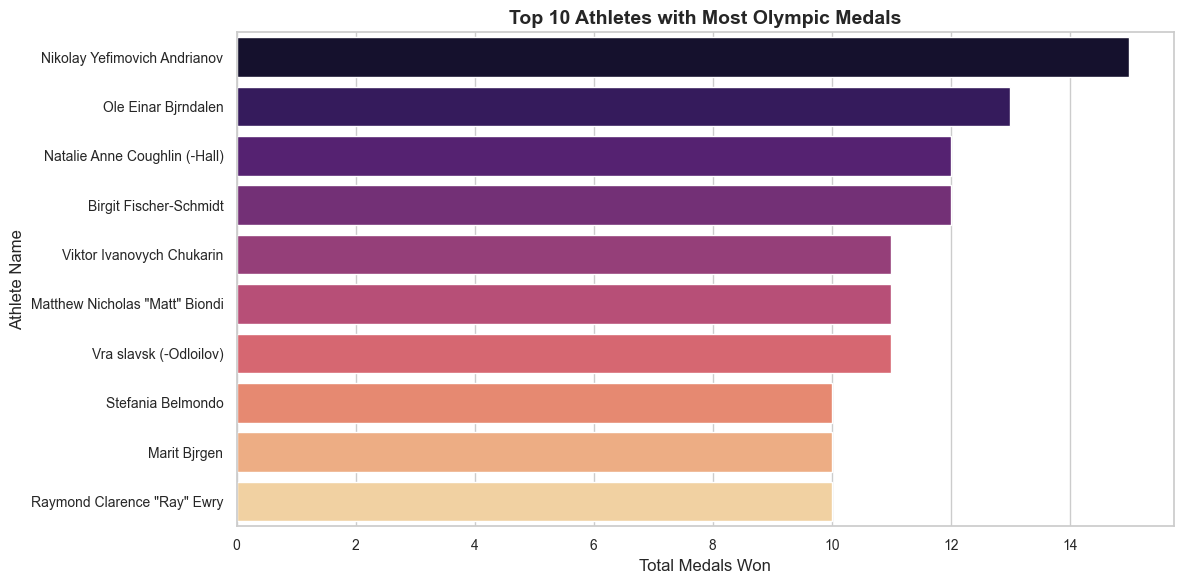

In [ ]:

medal_winners = df[df['Medal'].notna()]

# Count how many times each athlete won a medal
top_athletes = medal_winners['Name'].value_counts().head(10).reset_index()
top_athletes.columns = ['Name', 'Medal Count']
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=top_athletes, y='Name', x='Medal Count', hue='Name', palette='magma', dodge=False)
plt.legend([],[], frameon=False)  # Hide the legend

plt.title("Top 10 Athletes with Most Olympic Medals", fontsize=14, weight='bold')
plt.xlabel("Total Medals Won", fontsize=12)
plt.ylabel("Athlete Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


  **12. Which Cities Hosted the Olympics the Most**



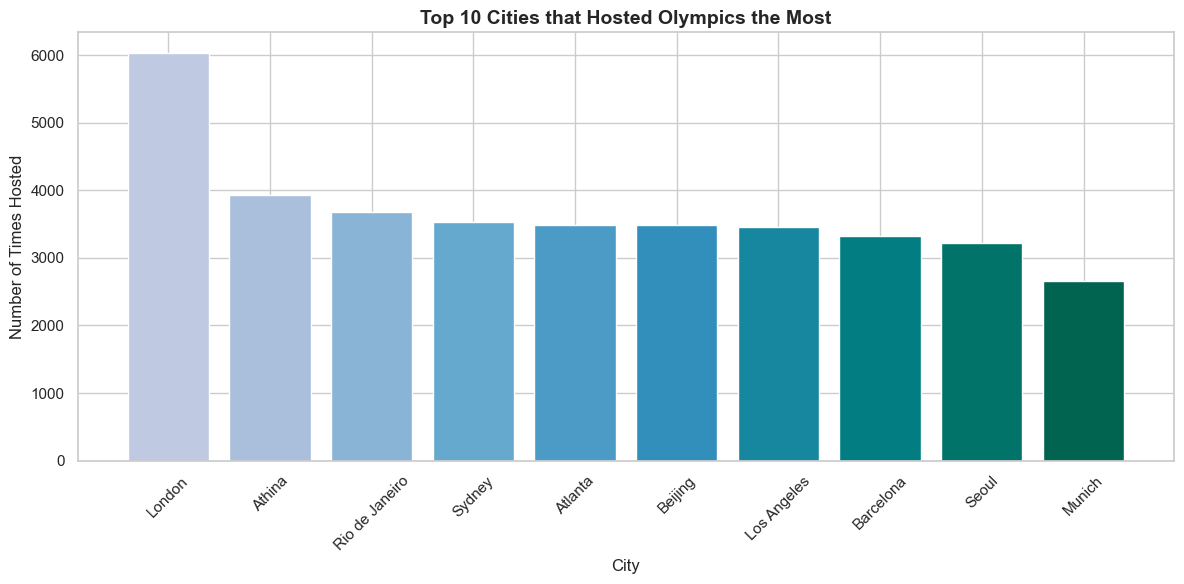

In [ ]:
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts().head(10)

colors = plt.cm.PuBuGn(np.linspace(0.3, 0.9, 10))
plt.bar(city_counts.index, city_counts.values, color=colors)
plt.title("Top 10 Cities that Hosted Olympics the Most", fontsize=14, weight='bold')
plt.xlabel("City")
plt.ylabel("Number of Times Hosted")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


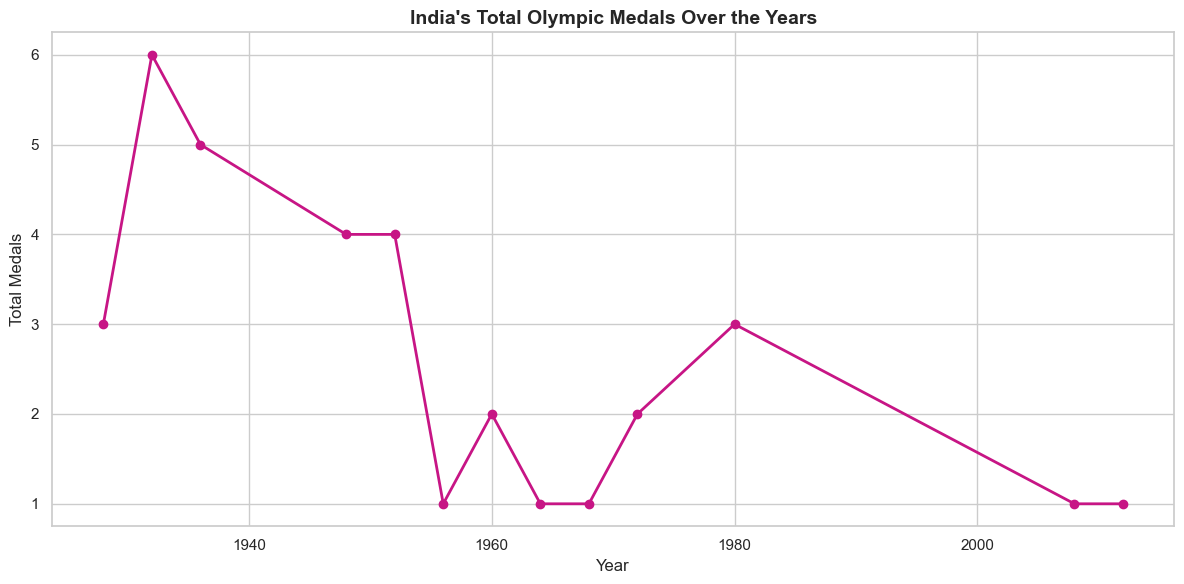

In [ ]:
india_df = df[(df['Team'] == 'India') & (df['Medal'].notna())]
medals_by_year = india_df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(medals_by_year.index, medals_by_year.values, marker='o', color='mediumvioletred', linewidth=2)
plt.title("India's Total Olympic Medals Over the Years", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.tight_layout()
plt.show()


 **14. Height vs Weight of Athletes by Gender**

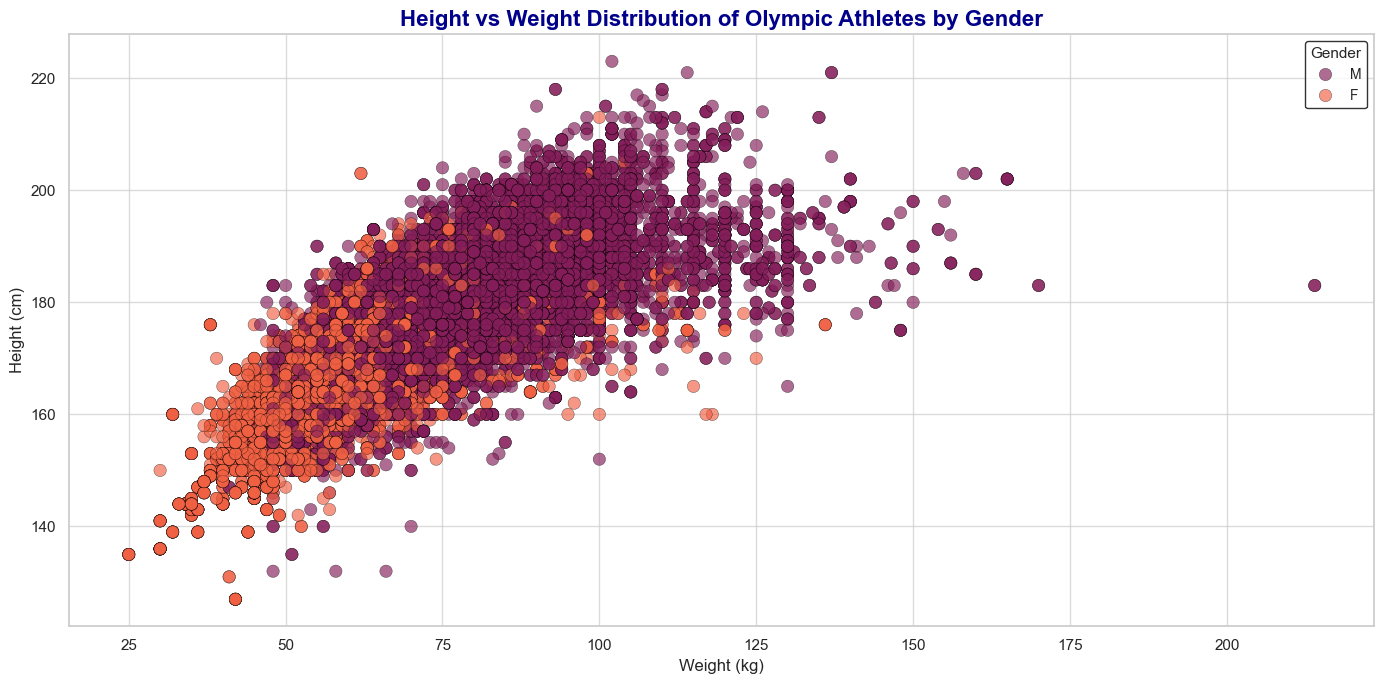

In [ ]:
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
sns.scatterplot(
    data=df,
    x='Weight',
    y='Height',
    hue='Sex',
    alpha=0.65,
    s=80,                       
    edgecolor='black',          
    linewidth=0.3,              
    palette='rocket'             
)
plt.title("Height vs Weight Distribution of Olympic Athletes by Gender", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Height (cm)", fontsize=12)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend(title="Gender", fontsize=10, title_fontsize=11, loc='upper right', frameon=True, facecolor='white', edgecolor='black')
plt.tight_layout()
plt.show()


**15.Analyze how participation has changed over time (number of athletes per year)**

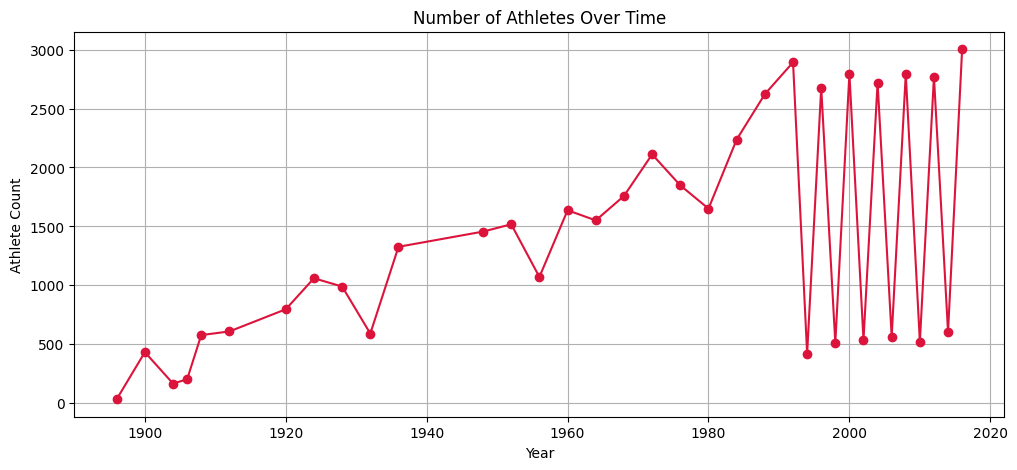

In [ ]:
athletes_per_year = df.groupby('Year')['ID'].nunique()
athletes_per_year.plot(kind='line', marker='o', figsize=(12,5), title='Number of Athletes Over Time',color='crimson')
plt.ylabel('Athlete Count')
plt.grid(True, linestyle='-')

plt.show()


**16.Number of events held per year**

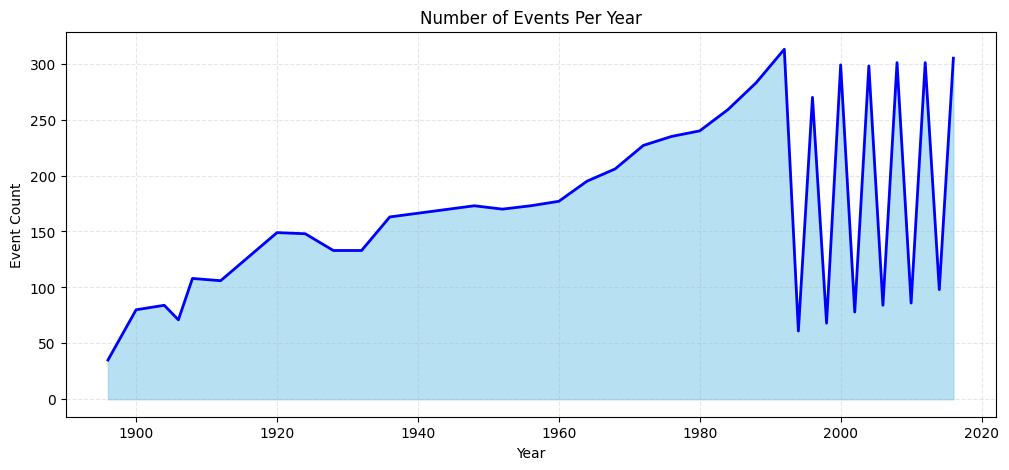

In [ ]:
events_per_year = df.groupby('Year')['Event'].nunique()
plt.figure(figsize=(12, 5))
plt.fill_between(events_per_year.index, events_per_year.values, color='skyblue', alpha=0.6)
plt.plot(events_per_year.index, events_per_year.values, color='blue', linewidth=2)
plt.title('Number of Events Per Year')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


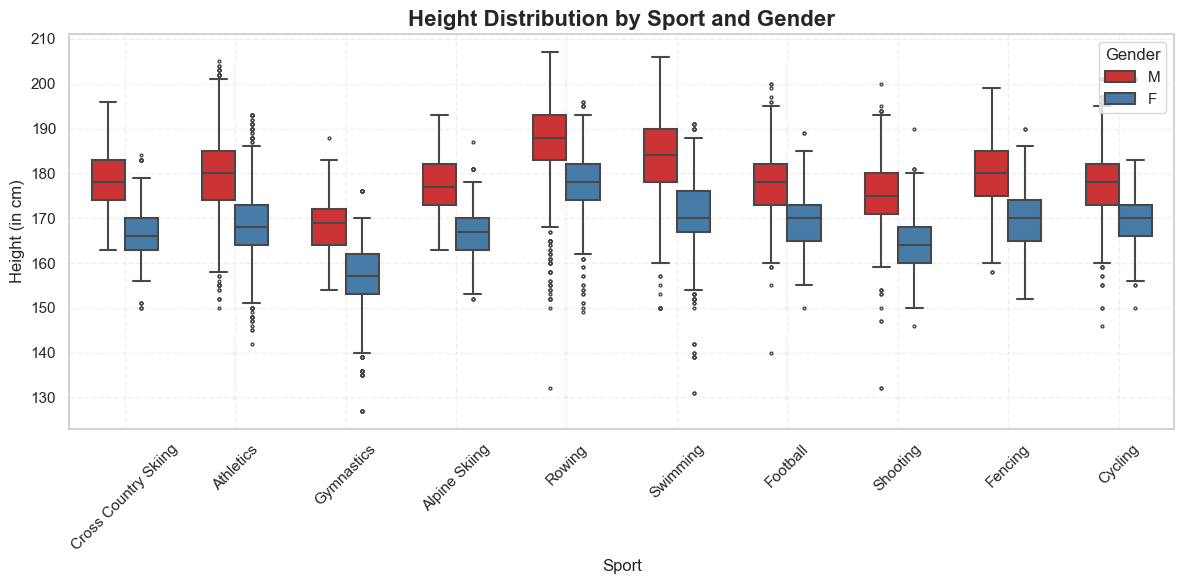

In [ ]:

top_sports = df['Sport'].value_counts().head(10).index
plot_df = df[df['Sport'].isin(top_sports)][['Sport', 'Height', 'Sex']].dropna()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")

sns.boxplot(data=plot_df, x='Sport', y='Height', hue='Sex', palette='Set1', width=0.6, linewidth=1.5, fliersize=2)

plt.title('Height Distribution by Sport and Gender', fontsize=16, fontweight='bold')
plt.ylabel('Height (in cm)', fontsize=12)
plt.xlabel('Sport', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


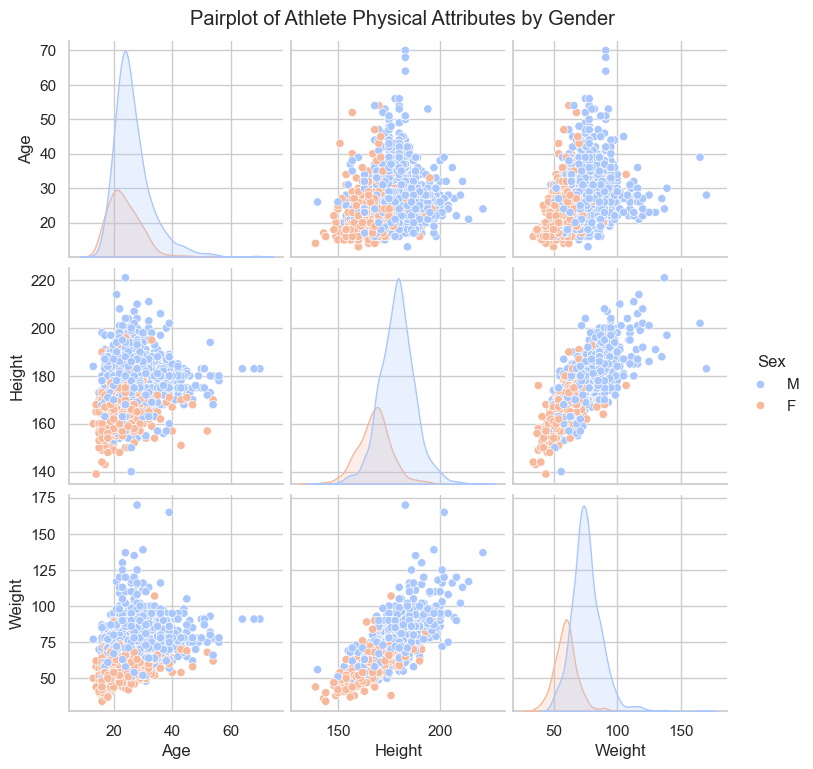

In [ ]:
sample_df = df[['Age', 'Height', 'Weight', 'Sex']].dropna().sample(n=2000, random_state=42)
sns.pairplot(sample_df, hue='Sex', palette='coolwarm')
plt.suptitle("Pairplot of Athlete Physical Attributes by Gender", y=1.02)
plt.show()


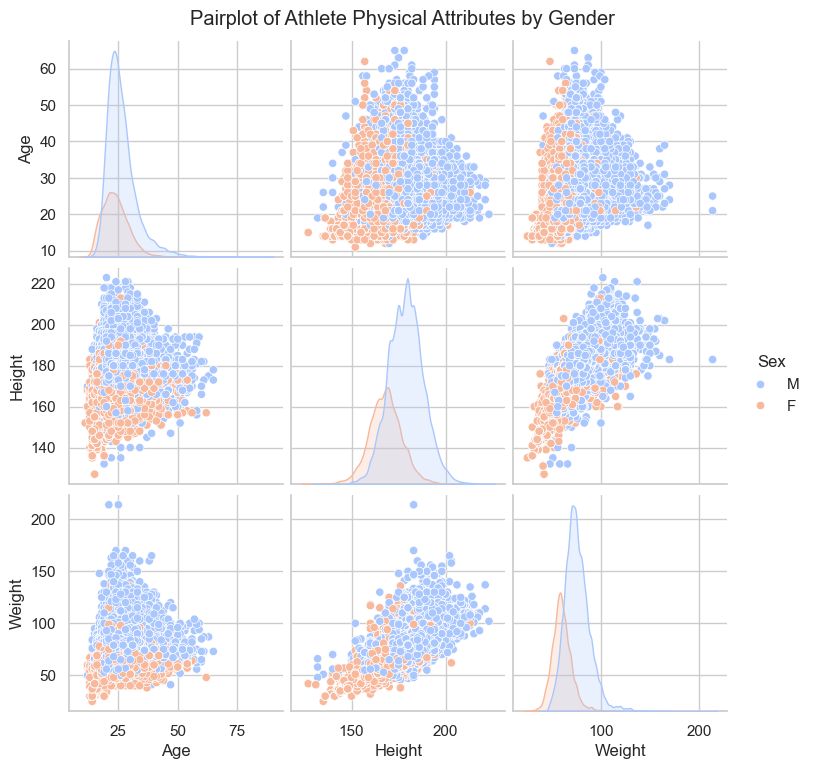

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Sport', y='Height', hue='Sex', data=df, split=True, inner='quart', palette='muted')
plt.xticks(rotation=90)
plt.title('Height Distribution by Sport and Gender')
plt.show()
